# Inference in multivariate von mises distributions

In [1]:
%matplotlib inline
from VonMisesFunctions import *

In [2]:
"""
Parameters
"""
# 1. BP parameters
K = 30 # no. of discrete bins
MaxIters, lam, eps = 500, 0.25, 1e-12

# 2. Gibbs sampling parameters
N_samples, T_burnin, T_skip = 4000, 2000, 50 # No. of samples to ignore for burn-in and, samples to skip

bin_edges, bin_centers = pi*np.arange(0,K+1)/K - pi/2, pi*(np.arange(0,K)/K + 0.5/K - 1/2)

Connected graph


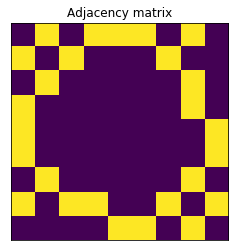

In [3]:
"""
Generate the parameters of the graphical model
"""

Ns = 9 # No. of variables in the graphical model

# Singleton factor parameters
s_strength = 3
KVec, MuVec = s_strength*np.random.rand(Ns), np.random.rand(Ns)*pi - pi/2 

# Pairwise factor parameters
c_sparsity, c_strength = 0.6, 2
J = generateCouplings(Ns, c_sparsity, c_strength)

AMat = (np.sum(np.abs(J),axis=2) != 0)*1  #Adjacency matrix  
    
print('Connected graph') if not(np.any(np.sum(AMat,axis=0) == 0)) else print('NOT a Connected graph')
    
plt.imshow(AMat)
plt.title('Adjacency matrix')
plt.xticks([]); plt.yticks([])
plt.show()

In [4]:
"""
Run belief propagation
"""

Phi, Psi, messages_t, beliefs_t, err_t = BPWrapper(Ns, KVec, MuVec, J, K, MaxIters, lam, eps)
BP_marginals = beliefs_t[:,:,-1]

Converged in 88 iterations
Time taken for BP =  0.173 s


In [5]:
"""
Run Gibbs sampler
"""

G_samples, G_marginals = GibbsSamplingWrapper(KVec, MuVec, J, K, N_samples, T_burnin, T_skip)

Time taken for Gibbs sampling =  50.158 s


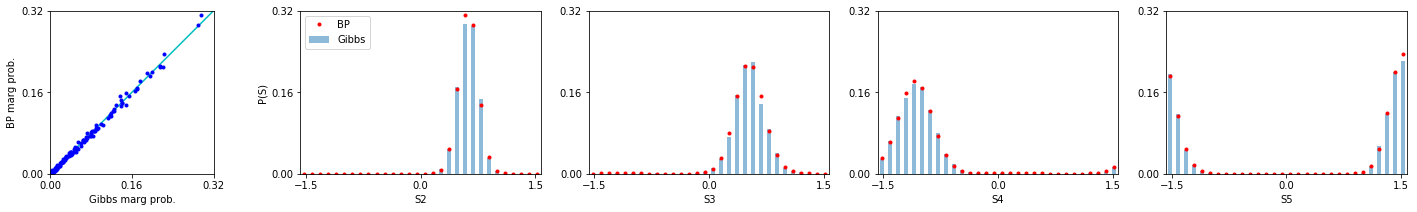

In [6]:
"""
Compare marginals from BP and Gibbs sampling
"""
bin_edges, bin_centers = pi*np.arange(0,K+1)/K - pi/2, pi*(np.arange(0,K)/K + 0.5/K - 1/2)

M = 5 if Ns>4 else Ns+1

pmax = max(np.ceil(np.max(BP_marginals)*100)/100,np.ceil(np.max(G_marginals)*100)/100)
    
fig, ax = plt.subplots(1,M,figsize=(5*M, 3))
ax = ax.ravel()

ax[0].plot([0,pmax],[0,pmax],'c')
ax[0].plot(G_marginals.flatten(), BP_marginals.flatten(),'b.')
ax[0].axis('square'); ax[0].axis([0,pmax,0,pmax])
ax[0].set_xlabel('Gibbs marg prob.'); ax[0].set_ylabel('BP marg prob.');
ax[0].set_xticks([0,pmax/2,pmax]); ax[0].set_yticks([0,pmax/2,pmax])

for i in range(1,M):
    ax[i].plot(bin_centers,BP_marginals[i-1],'r.')
    ax[i].bar(bin_centers,G_marginals[i-1],width=pi/2/K,alpha=0.5)
    
    ax[i].axis([-pi/2,pi/2,0,pmax])
    ax[i].set_xlabel('S'+str(i+1))
    ax[i].set_xticks([-1.5,0,1.5]); ax[i].set_yticks([0,pmax/2,pmax])

ax[1].set_ylabel('P(S)')
ax[1].legend(['BP','Gibbs'])
    
plt.show()